# Practical introduction to Julia-basics

We will cover:
- some more introduction
- docs
- variables
- datatypes
- arrays (longer exercise)
- flow control (small exercise)
- functions (larger exercise)
- multiple dispatch
- modules and packages

<div class="alert alert-block alert-info" title="Aside 1">

These slides are a [Jupyter notebook](https://jupyter.org/); a browser-based computational notebook.

Code cells are executed by putting the cursor into the cell and hitting `shift + enter`.  For more
info see the [documentation](https://jupyter-notebook.readthedocs.io/en/stable/).

</div>

### What does Julia look like?

Population Ecology: Lotka-Volterra

Lotka-Volterra equations describe the interactions between a predator (🦊) and a prey (🐰)

In [3]:
using Pkg; Pkg.instantiate()
using OrdinaryDiffEq, Plots

function lotka(u, p, t)
    🦊, 🐰 = u
    α, β, γ, δ = p

    d🦊 = α * 🦊 - β*🐰*🦊
    d🐰 = -γ*🐰 + δ * 🦊 * 🐰

    return [d🦊, d🐰]
end

p = [1.5,1.0,3.0,1.0]

# integrate dx/dt = lotka(t,x) numerically from t=0 to t=50 and starting point u₀
tspan = (0.0, 10.0)
u₀ = [1.0, 1.0]
sol = solve(ODEProblem(lotka, u₀, tspan, p), Tsit5()); # the ; suppresses the output

Yes, this takes some time... Julia is Just-Ahead-of-Time compiled.  I.e. Julia is compiling.

And its solution plotted

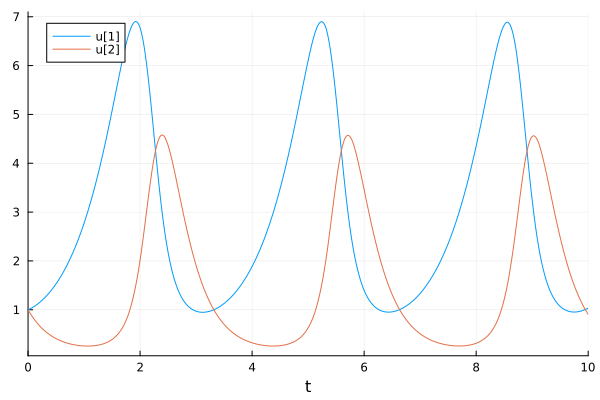

In [4]:
plot(sol) # plot LV solutions

###  Let's get our hands dirty!
1) You'll find this notebook and the solution version at `Day1/13_julia-practical-on-jupyter`

#### Without VS Code
1) start Jupyter in the folder containing the two files:
   - in the shell `jupyter notebook`
   - in the Julia REPL `julia> using IJulia; notebook()`
2) open notebook `13_julia-practical-on-jupyter.ipynb` in browser

#### With VS Code
2) Just open the file

--> everyone got it running?

###  Let's get our hands dirty!

We will now look at
- using Jupyter notebooks
- querying and getting Julia documentation
- variables and types
- control flow
- functions
- modules and packages

###  Where are the docs?

The documentation of Julia is good and can be found at [https://docs.julialang.org](https://docs.julialang.org); although for learning it might be a bit terse...

There are also tutorials, see [https://julialang.org/learning/](https://julialang.org/learning/); in case we don't cover something

Help on functions, variables, etc. can be gotten with `?xyz` (execute it directly in the REPL, it does not work yet with Jupyter...)

In [6]:
# cos

###  DO: Get help on π (pi)


In [4]:
#

## Variables, assignments, and types
[https://docs.julialang.org/en/v1/manual/variables/](https://docs.julialang.org/en/v1/manual/variables/)

In [5]:
a = 4
b = "a string"
c = b # now b and c bind to the same value

"a string"

Conventions:
- variables are (usually) lowercase, words can be separated by `_`
- function names are lowercase
- modules, packages and types are in CamelCase

### Variables: Unicode continued
From [https://docs.julialang.org/en/v1/manual/variables/](https://docs.julialang.org/en/v1/manual/variables/):

Unicode names (in UTF-8 encoding) are allowed:

```julia
julia> δ = 0.00001
1.0e-5

julia> 안녕하세요 = "Hello"
"Hello"
```

In the Julia REPL and several other Julia editing environments, you can type many Unicode math
symbols by typing the backslashed LaTeX symbol name followed by tab. For example, the variable
name `δ` can be entered by typing `\delta`-*tab*, or even `α̂⁽²⁾` by `\alpha`-*tab*-`\hat`-
*tab*-`\^(2)`-*tab*. (If you find a symbol somewhere, e.g. in someone else's code,
that you don't know how to type, the REPL help will tell you: just type `?` and
then paste the symbol.)

Emojis can be used, you can obtain 🐰 with `\:rabbit`-*tab*

### Basic datatypes
- numbers (Ints, Floats, Complex, etc.)
- strings
- tuples
- arrays
- dictionaries

In [6]:
1     # 64 bit integer (or 32 bit if on a 32-bit OS)
1.5   # Float64
1//2  # Rational

1//2

In [7]:
typeof(1.5)

Float64

In [8]:
"a string", (1, 3.5) # and tuple

("a string", (1, 3.5))

In [9]:
[1, 2, 3,] # array of eltype Int

3-element Vector{Int64}:
 1
 2
 3

In [10]:
Dict("a"=>1, "b"=>cos)

Dict{String, Any} with 2 entries:
  "b" => cos
  "a" => 1

In [11]:
(;a=1, b=cos) # named tuple

(a = 1, b = cos)

### Array exercises

Datatypes belonging to AbstactArrays:
- `Array` (with aliases `Vector`, `Matrix`)
- `Range`
- GPU arrays, static arrays, Rasters (geo-data-arrays), etc

Task: assign two vectors to `a`, and `b` and the concatenate them using `;`:

In [12]:
a = [2, 3]
b = [4, 5]
[a ; b]

4-element Vector{Int64}:
 2
 3
 4
 5

Add new elements to a empty Vector `c` (hint look up the documentation for `push!`)
((`push!` only works on Vectors, i.e. 1D arrays))

In [13]:
push!(b, 1)
push!(b, 3, 4)

5-element Vector{Int64}:
 4
 5
 1
 3
 4

### Array exercises

Concatenate a Range, say `1:10`, with a Vector, say [4,5]:

In [14]:
[1:10; [4,5]]

12-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
  4
  5

Make a random array of size (3,3).  Look up `?rand`.  Assign it to `a`

In [15]:
a = rand(3,3)

3×3 Matrix{Float64}:
 0.484633  0.387939  0.484729
 0.388364  0.505635  0.578516
 0.880782  0.372829  0.44353

### Array exercise: indexing

**Indexing starts at 1!**

Access element `[1,2]` and `[2,1]` of Matrix `a` (hint use []):

In [16]:
a[1,2], a[2,1]

(0.3879385023828492, 0.38836358042200525)

Put those two values into a vector

In [17]:
[ a[1,2], a[2,1] ]

2-element Vector{Float64}:
 0.3879385023828492
 0.38836358042200525

Linear vs Cartesian indexing,
access the first element:

In [18]:
a[1]
a[1,1]

0.48463320089454387

Access the last element (look up `?end`) both with linear and Cartesian indices

In [19]:
a[end]
a[end, end]

0.4435300111983468

### Array exercise: indexing by ranges

Access the last row of `a` (hint use `1:end`)

In [20]:
a[end, 1:end]

3-element Vector{Float64}:
 0.8807816403388233
 0.3728286028876815
 0.4435300111983468

Access a 2x2 sub-matrix

In [21]:
a[1:2, 1:2]

2×2 Matrix{Float64}:
 0.484633  0.387939
 0.388364  0.505635

### Array exercises: variable bindings and views

Create a random array, call it `a`. Assign `a` to a new variable `b`. Change an element in `b`. Does it affect `a`?

In [7]:
a = [1 4; 3 4] # note, this is another way to define a Matrix
c = a
a[1, 2] = 99
@assert c[1,2] == a[1,2]

### Side-trip: macros

Macros, starting with `@`, work on the code itself and not the values as usual functions.

In general you don't need to care how they work, just use them.

Useful macros:

In [23]:
@assert 1==1 # checks that expression evaluates to true, otherwise errors

@time 1+1 # times how long the execution takes

@show a # prints the value of a.  Useful for simple debugging: put @show into your functions

  0.000000 seconds
a = [1 99; 3 4]


2×2 Matrix{Int64}:
 1  99
 3   4

### Array exercises: variable bindings and views

An assignment _binds_ the same array to both variables

In [24]:
c = a
c[1] = 8
@assert a[1]==8 # as c and a are the same thing
@assert a===c  # note the triple `=` meaning "identical"

Views vs copies:

In Julia indexing with ranges will create a new array with copies of
the original's entries (similar to Matlab, unlike Python). Consider

In [25]:
a = rand(3,4)
b = a[1:3, 1:2]
b[1] = 99
@assert a[1] != b[1]

### Array exercises: variable bindings and views

But the memory footprint will be large if we work with large arrays and take sub-arrays of them.

"Views" to the rescue (note: another macro)

In [26]:
a = rand(3,4)
b = @view a[1:3, 1:2]
b[1] = 99

99

check whether the change in `b` is reflected in `a`:

In [27]:
@assert a[1] == 99

### Side-trip: types

All values have types as we saw above.  Arrays store in their type what type the elements can be.

> Arrays which have concrete element-types are more performant!

In [28]:
typeof([1, 2]), typeof([1.0, 2.0])

(Vector{Int64}, Vector{Float64})

Aside, they also store their dimension in the second parameter.

The type can be specified at creation

In [29]:
String["one", "two"]

2-element Vector{String}:
 "one"
 "two"

Create an array taking `Int` with no elements.  Push `1`, `1.0` and `1.5` to it.  What happens?

In [30]:
a = Int[]
push!(a, 1) ## works
push!(a, 1.0) ## works
try ## to allow the script to execute I need to wrap it in a try-catch block
  push!(a, 1.5) ## errors as 1.5 cannot be converted to an Int
catch; end

Make an array of type `Any` (which can store any value).  Push a value of type
Int and one of type String to it.

In [31]:
a = []
push!(a, 5)
push!(a, "a")

2-element Vector{Any}:
 5
  "a"

Try to assgin 1.5 to the first element of an array of type Array{Int,1}

In [32]:
try ## to allow the script to execute I need to wrap it in a try-catch block
[1][1] = 1.5 ## errors
catch; end

### Array exercises

Create a uninitialised Matrix of size (3,3) and assign it to `a`.
First look up the docs of Array with `?Array`

In [33]:
a = Array{Any}(undef, 3, 3)

3×3 Matrix{Any}:
 #undef  #undef  #undef
 #undef  #undef  #undef
 #undef  #undef  #undef

Test that its size is correct, see `size`

In [34]:
size(a)

(3, 3)

### Array exercises: ALL DONE

The rest about Arrays you will learn-by-doing during the rest of the workshop.

## Control flow

Julia provides a variety of [control flow constructs](https://docs.julialang.org/en/v1/manual/control-flow/), of which we look at:

  * [Conditional Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation): `if`-`elseif`-`else` and `?:` (ternary operator).
  * [Short-Circuit Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation): logical operators `&&` (“and”) and `||` (“or”), and also chained comparisons.
  * [Repeated Evaluation: Loops](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops): `while` and `for`.
  * [Exception-Handling](https://docs.julialang.org/en/v1/manual/control-flow/#Exception-Handling): `throw`ing exception, `try`/`catch` blocks

### Conditional evaluation

Read the first paragraph of
[https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation)
(up to "... and no further condition expressions or blocks are evaluated.")

Write a test which looks at the start of the string in variable `a`
(?startswith) and sets `b` accordingly.  If the start is
- "Wh" then set `b = "Likely a question"`
- "The " then set `b = "A noun"`
- otherwise set `b = "no idea"`

In [35]:
a = "Where are the flowers"
if startswith(a, "Wh")
  b = "Likely a question"
elseif startswith(a, "The")
  b = "Likely a noun"
else
  b = "no idea"
end

"Likely a question"

### Conditional evaluation: the "ternary operator" `?`

Look up the docs for `?` (i.e. evaluate `??`)

Re-write using `?`
```
a = rand() * 10
if a > 5
    "really big"
else
    "not so big"
end
```

In [36]:
a = rand() * 10
a > 5 ? "really big" : "not so big"

"really big"

### Short circuit operators `&&` and `||`

Read [https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation)

Explain what this does

```
a < 0 && error("Not valid input for `a`")
```

Type your answer here (to start editing, double click into this cell.  When done shift+enter):

If `a < 0` evaluates to `true` then the bit after the `&&` is evaluated too,
i.e. an error is thrown.  Otherwise, only `a < 0` is evaluated and no error is thrown.

### Loops: `for` and `while`

[https://docs.julialang.org/en/v1/manual/control-flow/#man-loops](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops)

In [37]:
for i = 1:3
    println(i)
end

for i in ["dog", "cat"] ## `in` and `=` are equivalent for writing loops
    println(i)
end

i = 1
while i<4
    println(i)
    global i += 1
end

1
2
3
dog
cat
1
2
3


## Functions

Functions can be defined in Julia in a number of ways.  In particular there is one variant
more suited to longer definitions, and one for one-liners:

```
function f(a, b)
   a * b
end
f(a, b) = a * b
```

Defining many, short functions is typical in good Julia code.

Read [https://docs.julialang.org/en/v1/manual/functions/](https://docs.julialang.org/en/v1/manual/functions/) up to an including "The return Keyword"

### Functions: exercises

Define a function in long-form which takes two arguments.
Use some if-else statements and the return keyword.

In [38]:
function fn(a, b)
  if a> b
    return a
  else
    return b
  end
end

fn (generic function with 1 method)

### Functions: exercises

Re-define the `map` function.  First look up what it does `?map`, then create a `mymap` which
does the same.  Map `sin` over the vector `1:10`.

(Note, this is a higher-order function: a function which take a function as a argument)

In [39]:
mymap(fn, a) = [fn(aa) for aa in a]
mymap(sin, 1:10)

10-element Vector{Float64}:
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385
 -0.27941549819892586
  0.6569865987187891
  0.9893582466233818
  0.4121184852417566
 -0.5440211108893698

### Functions: dot-syntax

This is really similar to the `map` function, a short-hand to map/broadcast a
function over values.

Example:

In [40]:
sin.(1:10)

10-element Vector{Float64}:
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385
 -0.27941549819892586
  0.6569865987187891
  0.9893582466233818
  0.4121184852417566
 -0.5440211108893698

--> more about this in the afternoon

### Functions: anonymous functions

So far our function got a name with the definition. They can also be defined without name.

Read [https://docs.julialang.org/en/v1/manual/functions/#man-anonymous-functions](https://docs.julialang.org/en/v1/manual/functions/#man-anonymous-functions)

Map the function `f(x,y) = sin(x) + cos(x)` over `1:10` but define `f` as an anonymous
function.

In [41]:
map(x -> sin(x) + cos(x), 1:10)

10-element Vector{Float64}:
  1.3817732906760363
  0.4931505902785393
 -0.8488724885405782
 -1.4104461161715403
 -0.6752620891999122
  0.6807547884514401
  1.4108888530620938
  0.8438582128147682
 -0.49901177664292035
 -1.383092639965822

### Key feature: multiple dispatch functions

- Julia is not an object oriented language

OO:
- methods belong to objects
- method is selected based on first argument (e.g. `self` in Python)

Multiple dispatch:
- methods are separate from objects
- are selected based on all arguments
- similar to overloading but method selection occurs at runtime and not compile-time (see also video below)
> very natural for mathematical programming

JuliaCon 2019 presentation on the subject by Stefan Karpinski
(co-creator of Julia):

["The Unreasonable Effectiveness of Multiple Dispatch"](https://www.youtube.com/watch?v=kc9HwsxE1OY)

## Functions: Multiple dispatch demo

In [42]:
struct Rock end
struct Paper end
struct Scissors end
### of course structs could have fields as well
# struct Rock
#     color
#     name::String
#     density::Float64
# end

# define multi-method
play(::Rock, ::Paper) = "Paper wins"
play(::Rock, ::Scissors) = "Rock wins"
play(::Scissors, ::Paper) = "Scissors wins"
play(a, b) = play(b, a) # commutative

play(Scissors(), Rock())

"Rock wins"

### Multiple dispatch demo
Can easily be extended later

with new type:

In [43]:
struct Pond end
play(::Rock, ::Pond) = "Pond wins"
play(::Paper, ::Pond) = "Paper wins"
play(::Scissors, ::Pond) = "Pond wins"

play(Scissors(), Pond())

"Pond wins"

with new function:

In [44]:
combine(::Rock, ::Paper) = "Paperweight"
combine(::Paper, ::Scissors) = "Two pieces of papers"
# ...

combine(Rock(), Paper())

"Paperweight"

*Multiple dispatch makes Julia packages very composable!*

This is a key characteristic of the Julia package ecosystem.

## Modules and packages

Modules can be used to structure code into larger entities, and be used to divide it into
different name spaces.  We will not make much use of those, but if interested see
[https://docs.julialang.org/en/v1/manual/modules/](https://docs.julialang.org/en/v1/manual/modules/)

**Packages** are the way people distribute code and we'll make use of them extensively.
In the first example, the Lotka-Volterra equations, you saw
```
using OrdinaryDiffEq, Plots
```
This statement loads the two packages `OrdinaryDiffEq` and `Plots` and makes their functions
and types available in the current session.

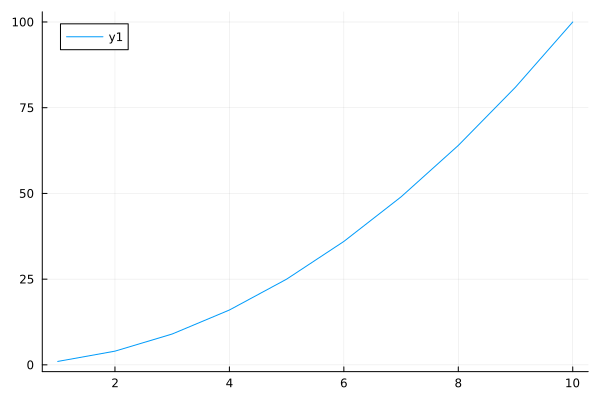

In [45]:
using Plots
plot( (1:10).^2 )

### Packages

Packages are in a sense Modules which you can install and then use.

All public Julia packages are listed on [https://juliahub.com/ui/Packages](https://juliahub.com/ui/Packages).

You can install a package, say `UnPack.jl` by
```
using Pkg
Pkg.add("UnPack.jl")
using UnPack
```

In the REPL, there is also a package-mode (hit `]`) which is for interactive use.

--> more about this later in the workshop

## This concludes the rapid Julia tour

There are many more features of Julia for sure but this should get you started for
the workshop.

Remember you can self-help with:
- using `?` at the notebook or REPL.  Similarly there is an `apropos` function.
- the docs are your friend [https://docs.julialang.org/en/v1/](https://docs.julialang.org/en/v1/)
- ask us for help!